In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')


import os

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
train_data = pd.read_csv('/content/train.csv',encoding='latin1');
test_data = pd.read_csv('/content/test.csv',encoding='latin1');

**CONCATENATE DATASET**

In [ ]:
df = pd.concat([train_data,test_data])

**DISPLAY DATASET**

In [ ]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


**CHECKING DTYPES**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10976 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            9695 non-null   object 
 1   text              9694 non-null   object 
 2   selected_text     6159 non-null   object 
 3   sentiment         9694 non-null   object 
 4   Time of Tweet     9694 non-null   object 
 5   Age of User       9694 non-null   object 
 6   Country           9694 non-null   object 
 7   Population -2020  9694 non-null   float64
 8   Land Area (Km²)   9694 non-null   float64
 9   Density (P/Km²)   9694 non-null   float64
dtypes: float64(3), object(7)
memory usage: 943.2+ KB


**Removing Unnecessary Charactors**

In [ ]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

**TOKENIZATION**

In [ ]:
#Tokenization

def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

Streaming output truncated to the last 5000 lines.
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error tokenizing text: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error toke

**Data Normalization**

In [12]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

**Removing Stopwords**

In [53]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

**Removing Missing Values**

In [14]:
df.dropna(inplace=True)


**SENTIMENT VALUECOUNTS**

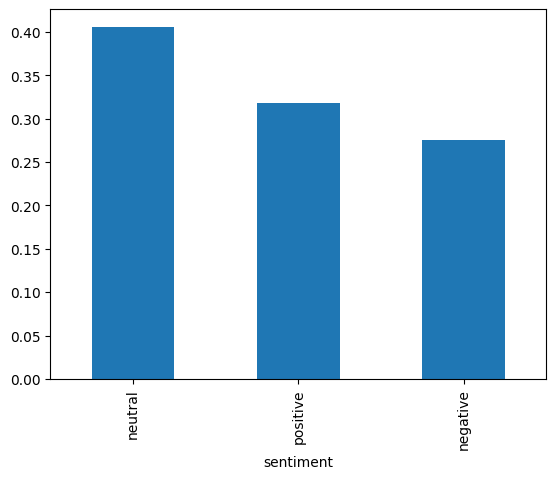

In [16]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [17]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,2501
positive,1961
negative,1697


**CATEGORIZATION**

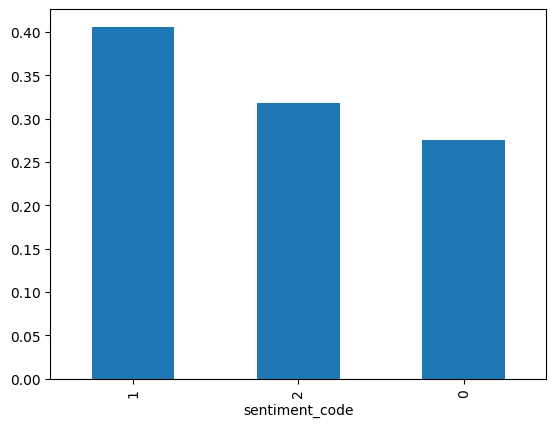

In [18]:
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

**Visualization Using Histplot**

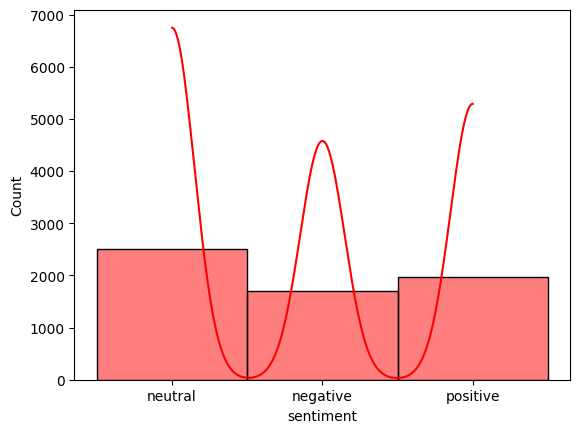

In [19]:
sns.histplot(df['sentiment'], kde=True, color = 'r')
plt.show()

**Stems Words Using the Lancaster Stemmer**

In [52]:
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Now you can safely use stopwords.words('english')
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

6159
 I`d have responded, if I were going


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Word Frequency Distribution**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


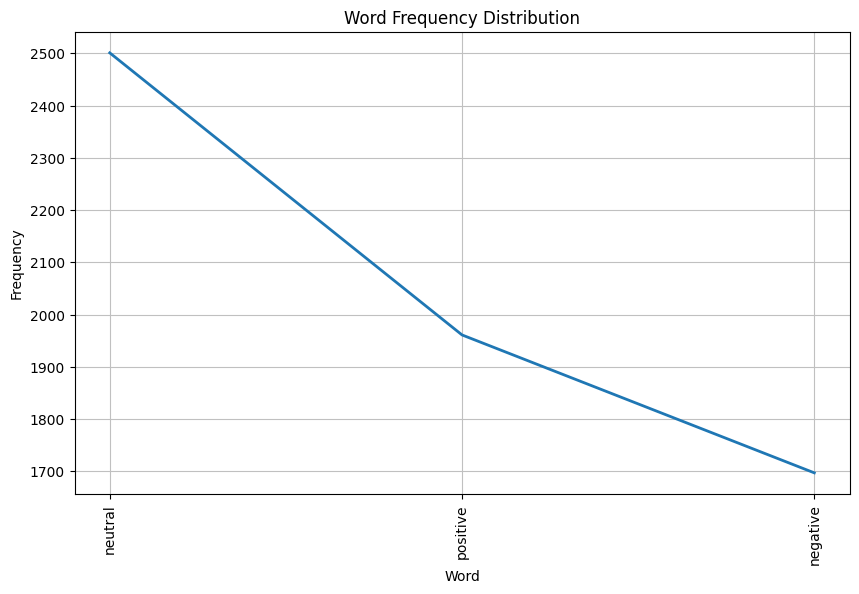

In [24]:
from nltk.probability import FreqDist
import nltk # import nltk library

nltk.download('punkt_tab') # download 'punkt_tab' resource
word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

**CONVERT To Strings**

In [21]:
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [22]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})

**Removing Irrelevent Columns**

In [23]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

**PREPROCESS TEXT**

In [25]:
import string
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['selected_text'] = df["selected_text"].apply(wp)

**Evaluation of Dataset**

In [26]:
X=df['selected_text']
y= df['sentiment']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Creating TF-IDF**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [29]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.40607241435297936

**Applying Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [31]:
pred_lr=lr.predict(XV_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.7978896103896104

In [33]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.78      0.75      0.76       341
     neutral       0.75      0.91      0.82       495
    positive       0.91      0.70      0.80       396

    accuracy                           0.80      1232
   macro avg       0.81      0.79      0.79      1232
weighted avg       0.81      0.80      0.80      1232



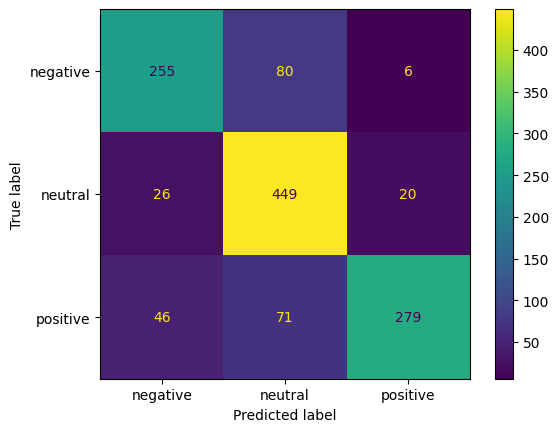

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

**Applying DecisionTreeClassifier**

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)

DecisionTreeClassifier()

In [36]:
pred_dt = dt.predict(XV_test)

In [37]:
score_dt = dt.score(XV_test, y_test)
score_dt

0.702922077922078

In [38]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.61      0.74      0.67       341
     neutral       0.71      0.73      0.72       495
    positive       0.82      0.64      0.72       396

    accuracy                           0.70      1232
   macro avg       0.71      0.70      0.70      1232
weighted avg       0.72      0.70      0.70      1232



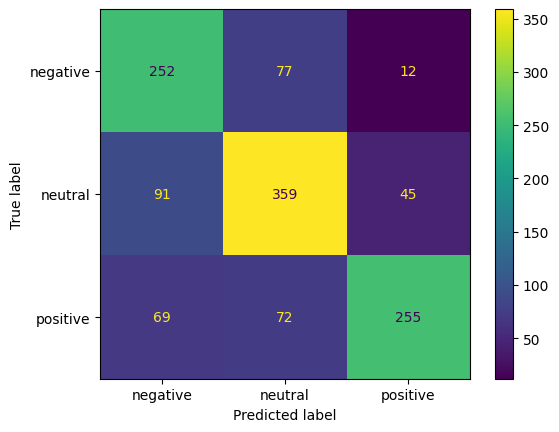

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);

**Applying RandomForestClassifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
pred_rfc = rfc.predict(XV_test)

In [42]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.7743506493506493

In [43]:
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

    negative       0.69      0.78      0.73       341
     neutral       0.76      0.87      0.81       495
    positive       0.91      0.65      0.76       396

    accuracy                           0.77      1232
   macro avg       0.79      0.77      0.77      1232
weighted avg       0.79      0.77      0.77      1232



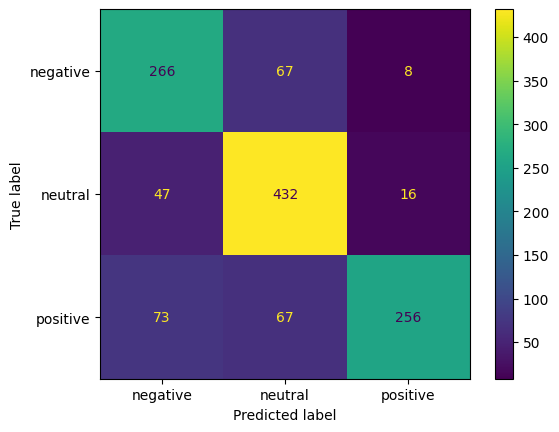

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);

**Results of Predictive Models**

In [45]:
print(f'Baseline model:{score_baseline} \nLogistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandim Forest Classifier {score_rfc}')

Baseline model:0.40607241435297936 
Logistic regression 0.7978896103896104
Decision Tree Classification 0.702922077922078
Randim Forest Classifier 0.7743506493506493


In [46]:
def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lable(pred_lr[1])))

In [47]:
def wp(text):
    return text.upper()
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    return new_xv_test
text = "I am Sad"
manual_testing(text)

<1x5918 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>